# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [90]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [91]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #if i == 1: break    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q='+ city +'&appid='+weather_api_key + '&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        json_string = json.dumps(city_weather_json, indent=4)
        #print(json_string)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        # print(city_lat)
        # print(city_lng)
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
    #except Exception as e:
        #print(f"Caught an exception: {e}")
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | charters towers
Processing Record 2 of Set 1 | tindouf
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | santiago acutzilapan
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | markovo
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | morant bay
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of S

In [92]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [93]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,charters towers,-20.1000,146.2667,12.76,91,18,3.47,AU,1691614490
1,tindouf,27.6711,-8.1474,40.25,8,0,6.17,DZ,1691614491
2,udachny,66.4167,112.4000,13.03,54,98,2.66,RU,1691614298
3,albany,42.6001,-73.9662,28.65,52,51,0.45,US,1691614229
4,afaahiti,-17.7500,-149.2833,26.93,71,93,6.18,PF,1691614491


In [94]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [95]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,charters towers,-20.1000,146.2667,12.76,91,18,3.47,AU,1691614490
1,tindouf,27.6711,-8.1474,40.25,8,0,6.17,DZ,1691614491
2,udachny,66.4167,112.4000,13.03,54,98,2.66,RU,1691614298
3,albany,42.6001,-73.9662,28.65,52,51,0.45,US,1691614229
4,afaahiti,-17.7500,-149.2833,26.93,71,93,6.18,PF,1691614491


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

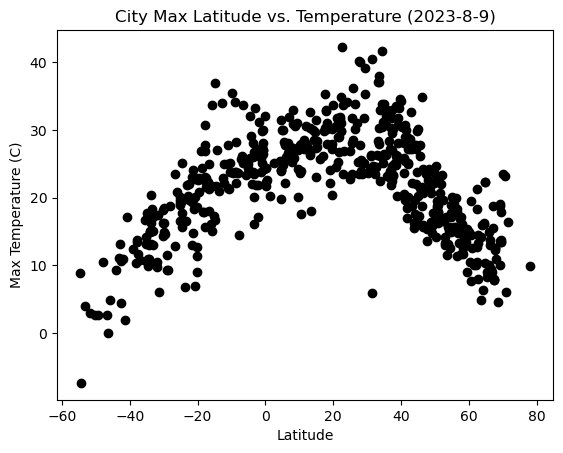

In [111]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', color='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-8-9)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

 #Lin-Reg
# d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(city_data_df["Lat"],  city_data_df["Max Temp"])
# regress_values = city_data_df["Lat"] * d_slope + d_int
# line_eq = "y = "+str(round(d_slope,2))+ "x + "+ str(round(d_int, 2))
# plt.annotate(line_eq, (-10,275), fontsize=15, color="red")
# plt.plot(city_data_df["Lat"],regress_values,"--")
#line_eq

# Show plot
plt.show()

#### Latitude Vs. Humidity

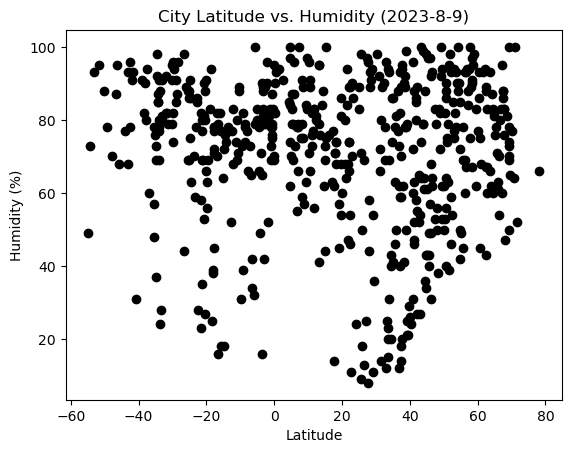

In [112]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', color='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-8-9)')

#  #Lin-Reg
# d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(city_data_df["Lat"],  city_data_df["Humidity"])
# regress_values = city_data_df["Lat"] * d_slope + d_int
# line_eq = "y = "+str(round(d_slope,2))+ "x + "+ str(round(d_int, 2))
# plt.annotate(line_eq, (-10,10), fontsize=15, color="red")
# plt.plot(city_data_df["Lat"],regress_values,"--")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

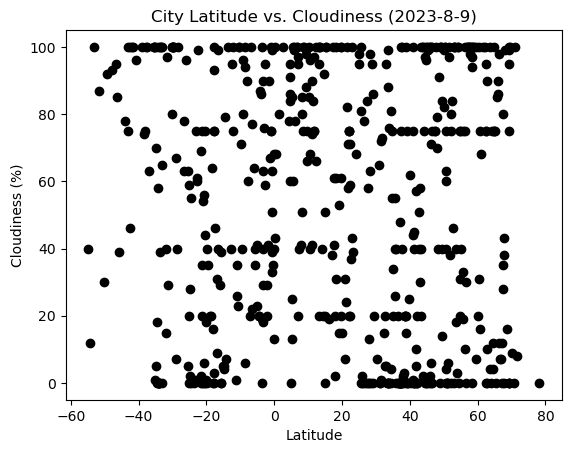

In [113]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', color='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-8-9)')

#  #Lin-Reg
# d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(city_data_df["Lat"],  city_data_df["Cloudiness"])
# regress_values = city_data_df["Lat"] * d_slope + d_int
# line_eq = "y = "+str(round(d_slope,2))+ "x + "+ str(round(d_int, 2))
# plt.annotate(line_eq, (-10,10), fontsize=15, color="red")
# plt.plot(city_data_df["Lat"],regress_values,"--")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

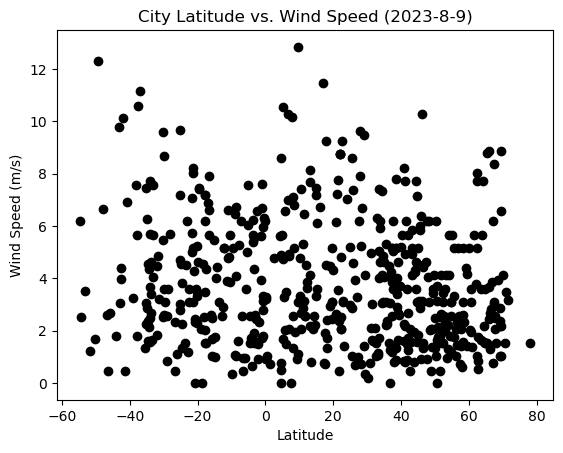

In [114]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', color='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-8-9)')

#  #Lin-Reg
# d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(city_data_df["Lat"],  city_data_df["Wind Speed"])
# regress_values = city_data_df["Lat"] * d_slope + d_int
# line_eq = "y = "+str(round(d_slope,2))+ "x + "+ str(round(d_int, 2))
# plt.annotate(line_eq, (-10,10), fontsize=15, color="red")
# plt.plot(city_data_df["Lat"],regress_values,"--")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
def create_lin_reg_plot(x_data, y_data, x_label, y_label, title, eq_x, eq_y, save_path=None):
     plt.scatter(x_data, y_data, marker='o', color='blue')
     plt.xlabel(x_label)
     plt.ylabel(y_label)
     plt.title(title)
     
     d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(x_data,  y_data)  
     regression_line = x_data * d_slope + d_int  
     line_eq = f'y = {d_slope:.2f}x + {d_int:.2f}'

     plt.plot(x_data, regression_line, "--", label=line_eq)
     print(f"The r-value is {d_r}")
     plt.annotate(line_eq, (eq_x,eq_y), fontsize=15, color="red")
     plt.show()

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tindouf,27.6711,-8.1474,40.25,8,0,6.17,DZ,1691614491
2,udachny,66.4167,112.4000,13.03,54,98,2.66,RU,1691614298
3,albany,42.6001,-73.9662,28.65,52,51,0.45,US,1691614229
6,stanley,54.8680,-1.6985,17.66,85,75,2.57,GB,1691614491
9,santiago acutzilapan,19.7833,-99.6833,20.41,54,61,2.45,MX,1691614491


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,charters towers,-20.1000,146.2667,12.76,91,18,3.47,AU,1691614490
4,afaahiti,-17.7500,-149.2833,26.93,71,93,6.18,PF,1691614491
5,west island,-12.1568,96.8225,24.99,83,75,5.14,CC,1691614491
7,waitangi,-43.9535,-176.5597,9.34,77,78,1.79,NZ,1691614491
8,port mathurin,-19.6833,63.4167,22.95,63,0,7.40,MU,1691614491


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.669771683248794


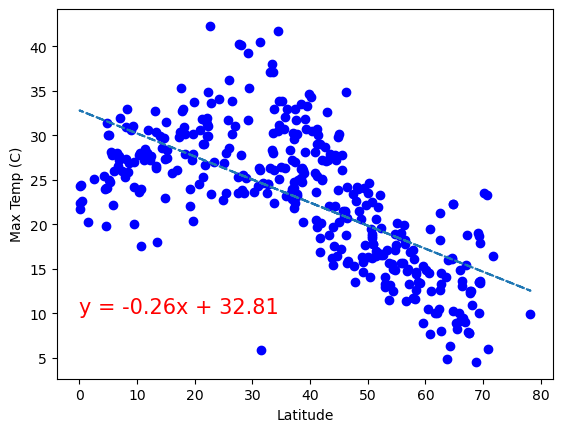

In [116]:
# Linear regression on Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'], "Latitude", "Max Temp (C)","",0, 10,save_path=None)

The r-value is 0.805163976418283


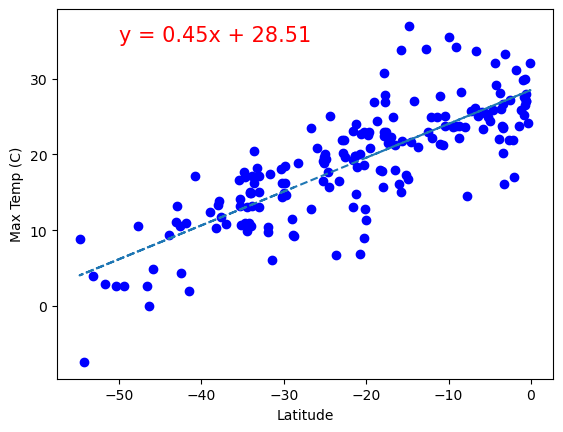

In [117]:
# Linear regression on Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'], "Latitude", "Max Temp (C)","",-50, 35,save_path=None)

**Discussion about the linear relationship:** Generally, the linear regression confirms that there is a decrease in temperature as the absolute value of the latitude increases. The south hemisphere seems to have a more pronounced change as we move away from the equator, though it has a larger r-value of 0.8.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.0005067542531508116


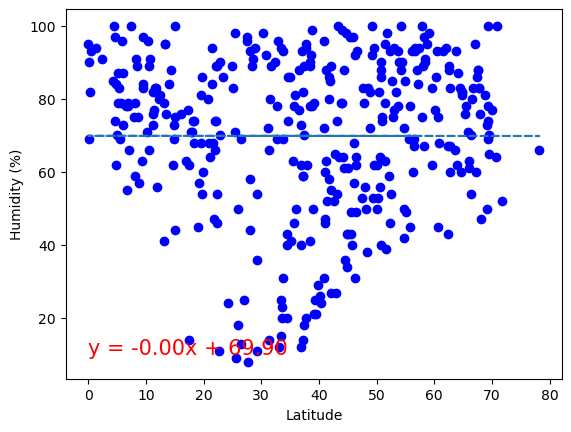

In [118]:
# Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Humidity'], "Latitude", "Humidity (%)","",0, 10,save_path=None)

The r-value is -0.14926061681866587


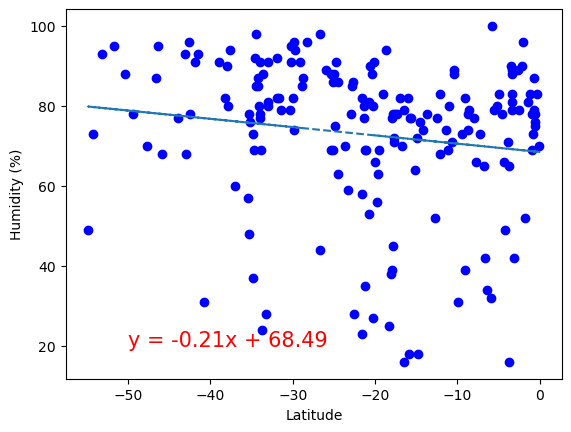

In [120]:
# Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Humidity'], "Latitude", "Humidity (%)","",-50, 20,save_path=None)

**Discussion about the linear relationship:** To start, the data for both hemisphere have a weak/low r-value. Meaning that there is a weak/no linear relationship between latitude and humidity. Suffice to say that there is a wide range of percent humidity at all latitudes.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.11507152602223038


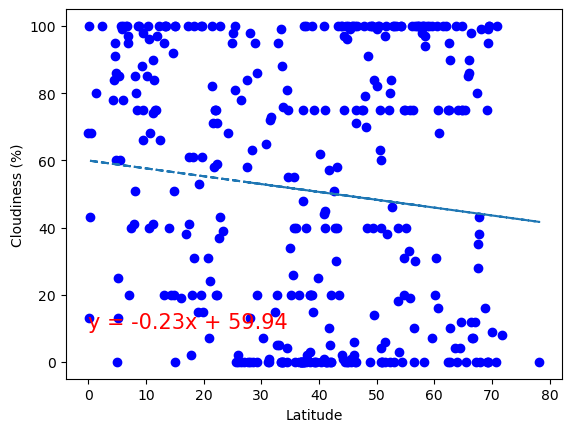

In [121]:
# Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)","",0, 10,save_path=None)

The r-value is -0.12293509097395508


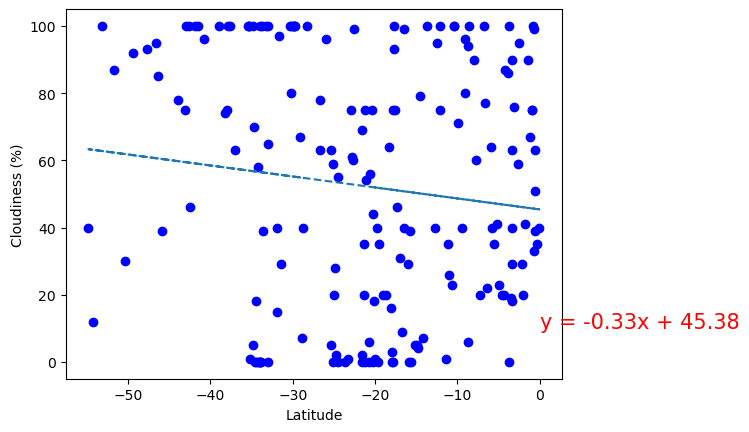

In [122]:
# Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness (%)","",0, 10,save_path=None)

**Discussion about the linear relationship:** Weak linear relationship in both hemispheres between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.15996470976473504


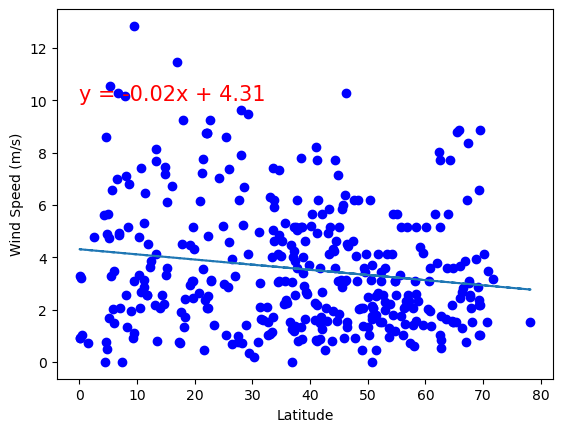

In [123]:
# Northern Hemisphere
create_lin_reg_plot(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)","",0, 10,save_path=None)

The r-value is -0.09749563573507196


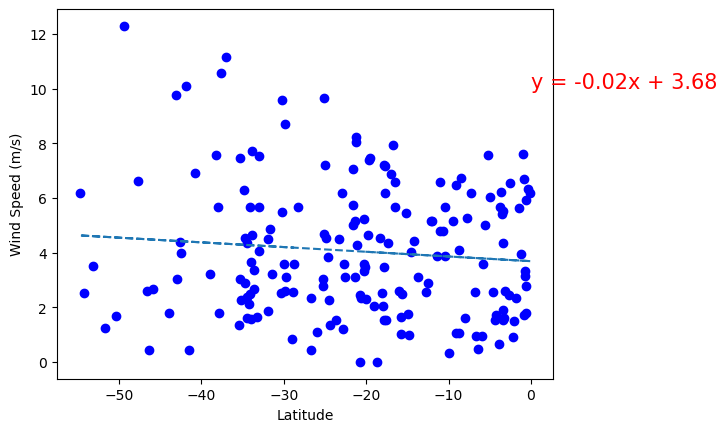

In [124]:
# Southern Hemisphere
create_lin_reg_plot(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed (m/s)","",0, 10,save_path=None)

**Discussion about the linear relationship:** Weak linear relationship between wind speed and latitude